In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

데이터 불러오기 및 결측치 확인

In [22]:
data =  pd.read_csv('/content/drive/MyDrive/Sleep_Efficiency.csv')
data

ID  Age  Gender              Bedtime          Wakeup time  \
0      1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00   
1      2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00   
2      3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00   
3      4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00   
4      5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00   
..   ...  ...     ...                  ...                  ...   
447  448   27  Female  2021-11-13 22:00:00  2021-11-13 05:30:00   
448  449   52    Male  2021-03-31 21:00:00  2021-03-31 03:00:00   
449  450   40  Female  2021-09-07 23:00:00  2021-09-07 07:30:00   
450  451   45    Male  2021-07-29 21:00:00  2021-07-29 04:00:00   
451  452   18    Male  2021-03-17 02:30:00  2021-03-17 10:00:00   

     Sleep duration  Sleep efficiency  REM sleep percentage  \
0               6.0              0.88                    18   
1               7.0              0.66                    24   
2               8.0              0.89                    20   
3               6.0              0.51                    28   
4               8.0              0.76                    27   
..              ...               ...                   ...   
447             7.5              0.91                    25   
448             6.0              0.74                    28   
449             8.5              0.55                    20   
450             7.0              0.76                    18   
451             7.5              0.63                    22   

     Deep sleep percentage  Light sleep percentage  Awakenings  \
0                       70                      10         0.0   
1                       28                      53         3.0   
2                       70                      10         1.0   
3                       25                      52         3.0   
4                       55                      18         3.0   
..                     ...                     ...         ...   
447                     57                      21         0.0   
448                     57                      21         4.0   
449                     30                      48         1.0   
450                     70                      10         3.0   
451                     23                      54         1.0   

     Caffeine consumption  Alcohol consumption Smoking status  \
0                     0.0                  0.0            Yes   
1                     0.0                  3.0            Yes   
2                     0.0                  0.0             No   
3                    50.0                  5.0            Yes   
4                     0.0                  3.0             No   
..                    ...                  ...            ...   
447                   0.0                  0.0             No   
448                  25.0                  0.0             No   
449                   NaN                  3.0            Yes   
450                   0.0                  0.0             No   
451                  50.0                  1.0             No   

     Exercise frequency  
0                   3.0  
1                   3.0  
2                   3.0  
3                   1.0  
4                   3.0  
..                  ...  
447                 5.0  
448                 3.0  
449                 0.0  
450                 3.0  
451                 1.0  

[452 rows x 15 columns]

In [23]:
data.drop

<bound method DataFrame.drop of       ID  Age  Gender              Bedtime          Wakeup time  \
0      1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00   
1      2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00   
2      3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00   
3      4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00   
4      5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00   
..   ...  ...     ...                  ...                  ...   
447  448   27  Female  2021-11-13 22:00:00  2021-11-13 05:30:00   
448  449   52    Male  2021-03-31 21:00:00  2021-03-31 03:00:00   
449  450   40  Female  2021-09-07 23:00:00  2021-09-07 07:30:00   
450  451   45    Male  2021-07-29 21:00:00  2021-07-29 04:00:00   
451  452   18    Male  2021-03-17 02:30:00  2021-03-17 10:00:00   

     Sleep duration  Sleep efficiency  REM sleep percentage  \
0               6.0              0.88                    18   
1               7.0              0.66

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     436 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [25]:
data.describe()

ID         Age  Sleep duration  Sleep efficiency  \
count  452.000000  452.000000      452.000000        452.000000   
mean   226.500000   40.285398        7.465708          0.788916   
std    130.625419   13.172250        0.866625          0.135237   
min      1.000000    9.000000        5.000000          0.500000   
25%    113.750000   29.000000        7.000000          0.697500   
50%    226.500000   40.000000        7.500000          0.820000   
75%    339.250000   52.000000        8.000000          0.900000   
max    452.000000   69.000000       10.000000          0.990000   

       REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
count            452.000000             452.000000              452.000000   
mean              23.002212              52.960177               24.831858   
std                3.972466              15.561713               15.150774   
min               15.000000              20.000000                7.000000   
25%               20.000000              51.250000               15.000000   
50%               22.000000              60.000000               18.000000   
75%               27.000000              63.000000               27.250000   
max               30.000000              75.000000               56.000000   

       Awakenings  Caffeine consumption  Alcohol consumption  \
count  432.000000            427.000000           436.000000   
mean     1.641204             23.653396             1.245413   
std      1.356762             30.202785             1.643336   
min      0.000000              0.000000             0.000000   
25%      1.000000              0.000000             0.000000   
50%      1.000000             25.000000             0.000000   
75%      3.000000             50.000000             2.000000   
max      4.000000            200.000000             5.000000   

       Exercise frequency  
count          446.000000  
mean             1.791480  
std              1.428134  
min              0.000000  
25%              0.000000  
50%              2.000000  
75%              3.000000  
max              5.000000

In [26]:
columns_list = data.columns.tolist()


print("data columns:", columns_list)

data columns: ['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']


In [27]:
columns_to_drop = ['ID', 'Bedtime', 'Wakeup time']
data = data.drop(columns=columns_to_drop, axis=1)

In [28]:
data

Age  Gender  Sleep duration  Sleep efficiency  REM sleep percentage  \
0     65  Female             6.0              0.88                    18   
1     69    Male             7.0              0.66                    24   
2     40  Female             8.0              0.89                    20   
3     40  Female             6.0              0.51                    28   
4     57    Male             8.0              0.76                    27   
..   ...     ...             ...               ...                   ...   
447   27  Female             7.5              0.91                    25   
448   52    Male             6.0              0.74                    28   
449   40  Female             8.5              0.55                    20   
450   45    Male             7.0              0.76                    18   
451   18    Male             7.5              0.63                    22   

     Deep sleep percentage  Light sleep percentage  Awakenings  \
0                       70                      10         0.0   
1                       28                      53         3.0   
2                       70                      10         1.0   
3                       25                      52         3.0   
4                       55                      18         3.0   
..                     ...                     ...         ...   
447                     57                      21         0.0   
448                     57                      21         4.0   
449                     30                      48         1.0   
450                     70                      10         3.0   
451                     23                      54         1.0   

     Caffeine consumption  Alcohol consumption Smoking status  \
0                     0.0                  0.0            Yes   
1                     0.0                  3.0            Yes   
2                     0.0                  0.0             No   
3                    50.0                  5.0            Yes   
4                     0.0                  3.0             No   
..                    ...                  ...            ...   
447                   0.0                  0.0             No   
448                  25.0                  0.0             No   
449                   NaN                  3.0            Yes   
450                   0.0                  0.0             No   
451                  50.0                  1.0             No   

     Exercise frequency  
0                   3.0  
1                   3.0  
2                   3.0  
3                   1.0  
4                   3.0  
..                  ...  
447                 5.0  
448                 3.0  
449                 0.0  
450                 3.0  
451                 1.0  

[452 rows x 12 columns]

In [29]:
le  = LabelEncoder()
data['Smoking status'] = le.fit_transform(data['Smoking status'])
data['Gender'] = le.fit_transform(data['Gender'])

<Axes: >

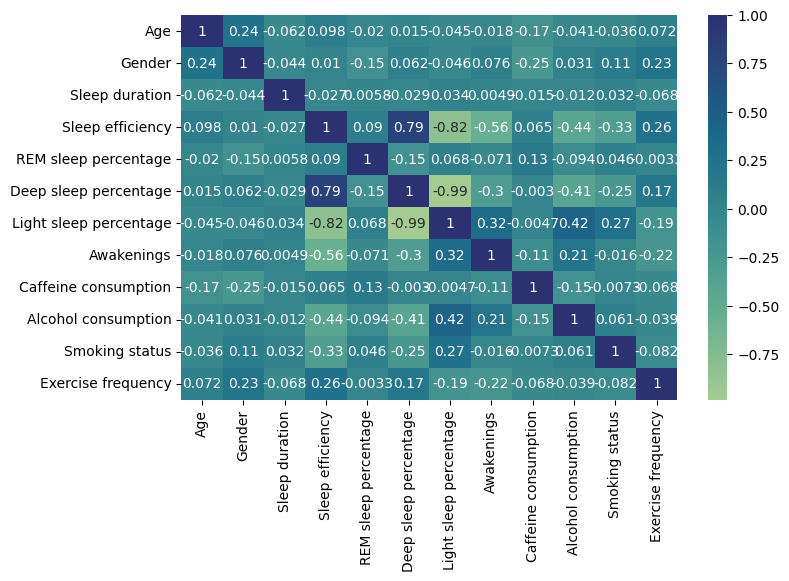

In [30]:
corr_matrix=data.corr()
plt.figure(1, figsize=(8,5))
sns.heatmap(corr_matrix, cmap='crest', center=0, annot=True)

In [31]:
X = data.drop(['Sleep efficiency'],axis =1)
y = data['Sleep efficiency']

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Feature와 Target 설정
X = data.drop(['Sleep efficiency'], axis=1)
y = data['Sleep efficiency']

# NaN 값 대체
imputer = SimpleImputer(strategy='mean')  # 평균값으로 대체
X_imputed = imputer.fit_transform(X)

# Train과 Test 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 피팅
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train 데이터에 대한 예측 및 평가
y_train_pred = linear_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Test 데이터에 대한 예측 및 평가
y_test_pred = linear_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# 결과 출력
print("Train Mean Squared Error (MSE):", mse_train)
print("Train R-squared:", r2_train)

print("\nTest Mean Squared Error (MSE):", mse_test)
print("Test R-squared:", r2_test)

Train Mean Squared Error (MSE): 0.0032625448842700166
Train R-squared: 0.8202366031902826

Test Mean Squared Error (MSE): 0.003642229053196278
Test R-squared: 0.8043712402464299


In [33]:
#랜덤포레스트 성능 평가
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

# 훈련 데이터에 대한 성능 평가
train_pred = rf_reg.predict(X_train)
train_rmse = mean_squared_error(y_train, train_pred, squared=False)
train_r2 = r2_score(y_train, train_pred)

print("Train RMSE:", train_rmse)
print("Train R^2:", train_r2)

# 테스트 데이터에 대한 성능 평가
test_pred = rf_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, test_pred, squared=False)
test_r2 = r2_score(y_test, test_pred)

print("\nTest RMSE:", test_rmse)
print("Test R^2:", test_r2)

Train RMSE: 0.018326224341499154
Train R^2: 0.98149492847061

Test RMSE: 0.05080981236894154
Test R^2: 0.8613369880046331
